# Purpose:

* For this project, I examined data on a person's height, weight and gender. 
* I am using this data to create a predictive model to classify a person into a category based on their Body Mass Index (BMI).

### Index Types:
    - 0 - Extremely Weak 
    - 1 - Weak 
    - 2 - Normal 
    - 3 - Overweight 
    - 4 - Obesity 
    - 5 - Extreme Obesity
    
   
Index Types from the Dataset are compared to those defined by the World Health Organization (WHO)
Table 1. Nutritional status

### BMI	Nutritional status: 

**Underweight:** Below 18.5   

**Normal weight:** 18.5–24.9   

**Pre-obesity:** 25.0–29.9   

**Obesity class I:** 30.0–34.9   

**Obesity class II:** 35.0–39.9   

**Obesity class III:** Above 40   


### NOTE:
* It is unclear from the data source which index type correlates to which type according to WHO. 

Source: http://www.euro.who.int/en/health-topics/disease-prevention/nutrition/a-healthy-lifestyle/body-mass-index-bmi

### How to Calculate BMI:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ce191830a28c6f957ca8b1644bc2ac6b34b8545b" />
    
For more information about BMI: https://en.wikipedia.org/wiki/Body_mass_index

# Part 1: Data Analysis

In [4]:
import pandas as pd

df = pd.read_csv('final_dataset/Gender_Height_Weight.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [7]:
# Convert the data from index column into category type

def convert_index_to_category(df):
    if df['Index'] == 0:
        return 'Extremely Weak'
    elif df['Index'] == 1:
        return 'Weak'
    elif df['Index'] == 2:
        return 'Normal'
    elif df['Index'] == 3:
        return 'Overweight'
    elif df['Index']== 4:
        return 'Obesity'
    elif df['Index'] == 5:
        return 'Extreme Obesity'
    
df['Category'] = df.apply(convert_index_to_category, axis=1)  # Add a new column 
df.head()

,Gender,Height,Weight,Index,Category
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


In [7]:
# Rename Columns

df.rename(columns = {'Height' : 'Height (cm)', 'Weight' : ' Weight (kg)'})

,Gender,Height (cm),Weight (kg),Index,Category
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight
...,...,...,...,...,...
495,Female,150,153,5,Extreme Obesity
496,Female,184,121,4,Obesity
497,Female,141,136,5,Extreme Obesity
498,Male,150,95,5,Extreme Obesity


# Let's see a visual of the values in each Category

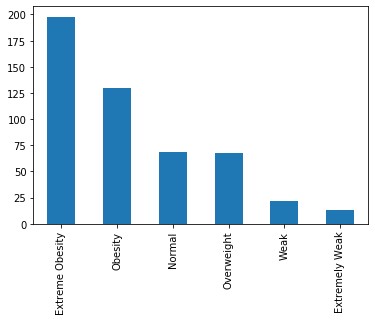

In [22]:
df['Category'].value_counts().plot(kind='bar')

# Here are the numbers:

In [15]:
df['Category'].value_counts()

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Category, dtype: int64

# Plot of the heights, weights, and categories

Text(0.5, 0.98, 'Height (cm) vs Weight (kg)')

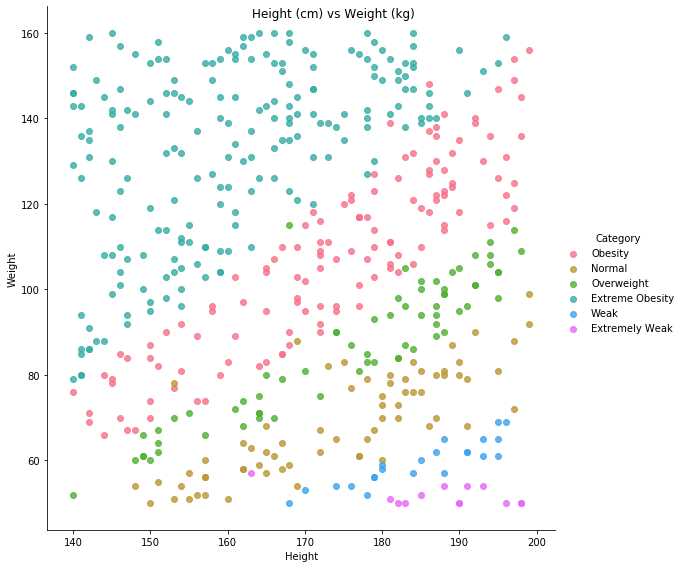

In [18]:
# Show plot of the different categories

import seaborn as sns
import matplotlib as plt


sns.lmplot( x='Height', y='Weight', data=df, 
           fit_reg=False, 
           hue='Category', 
           legend=True, 
           palette='husl',
           size = 8, 
           aspect = 1,
          ).fig.suptitle("Height (cm) vs Weight (kg)")
  

In [8]:
# Change and create a column for the value of male to 1 and female to 0

def convert_gender_to_num(x):
    if x['Gender'] == 'Male':
        return 1
    elif x['Gender'] == 'Female':
        return 0
df['Gender Number'] = df.apply(convert_gender_to_num, axis=1)
df.head()

,Gender,Height,Weight,Index,Category,Gender Number
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
4,Male,149,61,3,Overweight,1


# Part 2: Machine Learning 

* Using Logistic Regression

# Change 'Index' into 2 Classifications:

1) healthy = 2 ---> 1

2) unhealthy = 0, 1, 3, 4, 5 ---> 0

* Create a function that converts the numbers into the 0(healthy) or 1(unhealthy)

In [9]:
def convert_index_to_label(df):
    if df['Index'] == 0:
        return 0
    elif df['Index'] == 1:
        return 0
    elif df['Index'] == 2:    # 2 is normal and this is healthy
        return 1
    elif df['Index'] == 3:
        return 0
    elif df['Index']== 4:
        return 0
    elif df['Index'] == 5:
        return 0
    
df['Labels'] = df.apply(convert_index_to_label, axis=1)  # Add a new column called Labels
df.head()

,Gender,Height,Weight,Index,Category,Gender Number,Labels
0,Male,174,96,4,Obesity,1,0
1,Male,189,87,2,Normal,1,1
2,Female,185,110,4,Obesity,0,0
3,Female,195,104,3,Overweight,0,0
4,Male,149,61,3,Overweight,1,0


# Split the data into train and test 

In [10]:
from sklearn.model_selection import train_test_split

feature_cols = ['Gender Number', 'Height', 'Weight']

X = df[feature_cols]

y = df['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

y_test.value_counts()

0    113
1     12
Name: Labels, dtype: int64

# Normalize the data by scaling it

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)  # 
X_test = scaler.transform(X_test)

In [12]:
# Build the classifier model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
# Score the model on the train data

logreg.score(X_train, y_train)*100

81.33333333333333

In [14]:
# Score the model on the test data
print(logreg.score(X_test, y_test)*100)

# in class we came across this issue where the numbers were negative so I multiplied by -1
print(logreg.coef_*-1)

86.4
[[ 0.17611151 -0.35930161  1.82390761]]


# We see that the third feature, which is weight, plays a large role in determining someones BMI
### This makes sense because BMI is a measure of someone's thickness or thinness
(The more heavy someone is, the thicker their body is)

# Create Predictions with this Model

In [96]:
Person1 = np.array([1.0, 62.0, 54.0])   # Female, 62cm tall, 54kg
Person2 = np.array([1.0, 62.0, 59.0])   # Female, 62cm tall, 59kg
Person3 = np.array([0.0, 66.0, 59.0])   # Male, 66cm tall, 59kg

In [97]:
test_subjects = np.array([Person1, Person2, Person3])

In [102]:
# Scale the subjects on their features

test_subjects = scaler.transform(test_subjects)
logreg.predict(test_subjects)

array([0, 0, 1])

# The model shows us that 1 person is healthy and 2 are unhealthy

## Remember: I categorized the 'Normal' Index as Healthy, and everything else as Unhealthy

In [105]:
y_pred = logreg.predict(X_test)

print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Create a confusion matrix to see the performance of the classifer

In [106]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[107   6]
 [ 11   1]]


# Results:

* True Negative = 107
* False Positive = 6
* False Negative = 11
* True Positive = 1

In [107]:
# .predict returns a list of 0 and 1 values for a given sample

y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [108]:
# A list of lists where each element in the list is a probability estimate: 
# the probability of the element being 0 or 1

logreg.predict_proba(X_test)

array([[0.99371273, 0.00628727],
       [0.99270588, 0.00729412],
       [0.9546211 , 0.0453789 ],
       [0.99362539, 0.00637461],
       [0.99146319, 0.00853681],
       [0.95164384, 0.04835616],
       [0.8922769 , 0.1077231 ],
       [0.99197255, 0.00802745],
       [0.93113878, 0.06886122],
       [0.98899686, 0.01100314],
       [0.61517792, 0.38482208],
       [0.77890014, 0.22109986],
       [0.4816276 , 0.5183724 ],
       [0.95382245, 0.04617755],
       [0.99011777, 0.00988223],
       [0.88034292, 0.11965708],
       [0.97351752, 0.02648248],
       [0.87190397, 0.12809603],
       [0.95928959, 0.04071041],
       [0.8826178 , 0.1173822 ],
       [0.87270424, 0.12729576],
       [0.82455003, 0.17544997],
       [0.82488506, 0.17511494],
       [0.90951722, 0.09048278],
       [0.70922531, 0.29077469],
       [0.55215268, 0.44784732],
       [0.99519191, 0.00480809],
       [0.96689181, 0.03310819],
       [0.80925432, 0.19074568],
       [0.73009619, 0.26990381],
       [0.

In [109]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

86.4

# Conclusions:
* Accuracy = 86.4
* Used features: gender, height, and weight to make predictions
* 2 Categories for the Predictions: healthy and unhealthy